In [43]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

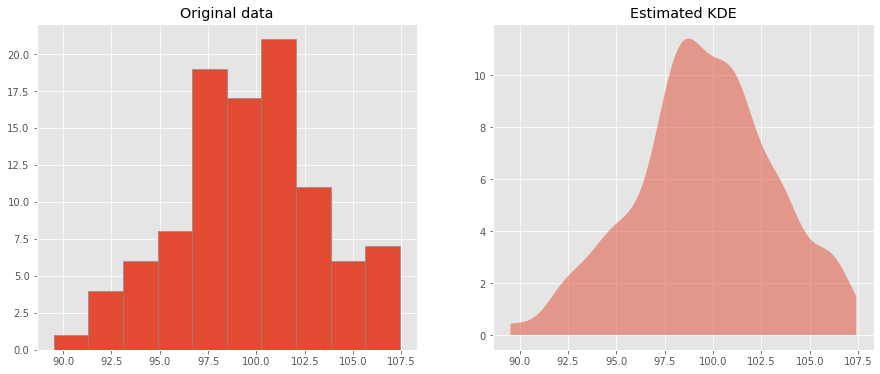

In [56]:
def kde(X):
    min_x = X.min()
    max_x = X.max()
    num_obs = X.shape[0]
    X_axis = np.linspace(min_x, max_x, num_obs)
    gaussian_result = sum([norm(x).pdf(X_axis) for x in X])
    return X_axis, gaussian_result

rng = np.random.RandomState(42)
X = rng.normal(100, 4, size=100)
X_axis, gaussian_result = kde(X)

fig, axes = plt.subplots(1, 2, figsize=[15,6])
axes[0].hist(X, edgecolor='grey')
axes[0].set_title('Original data')
axes[1].fill_between(X_axis, gaussian_result, alpha=0.5)
axes[1].set_title('Estimated KDE');